#### init

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from toy_exp import Experiment

In [3]:
from src.models import UNet

### CONSTANTS

DEVICE='cpu'

In [4]:
def profile(d):
    return torch.clip(1-torch.abs(d),0)
def length(shape):
    return torch.rand(shape, device=DEVICE)*75+100
def orientation(shape):
    return torch.rand(*shape)*np.pi

## Baseline

In [5]:
base = Experiment(UNet(1, 1, 16, nscale=3, downsampling='conv'))
base.batchsize = 16
base.lr = 2e-2

In [6]:
base.train()

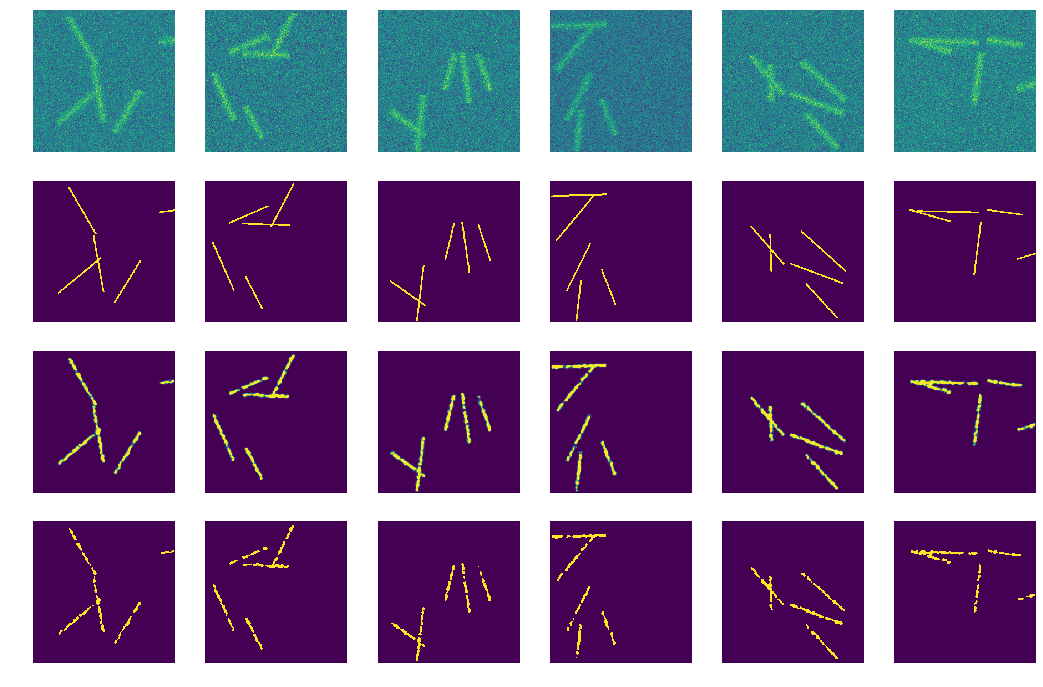

In [12]:
fig = base.plot_test_samples()


In [8]:
base.training_logs

,iterations,loss
0,5,0.448187
1,10,0.158311
2,15,0.072834
3,20,0.044888
4,25,0.035777
5,30,0.031986
6,35,0.028993
7,40,0.028868
8,45,0.028125
9,50,0.028639
